In [1]:
import pandas as pd
import numpy as np
import string

In [2]:
# Import movies dataset: https://www.kaggle.com/michau96/are-popular-movies-good?select=movies.csv 
# import budget dataset: https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset?select=tmdb_movies_data.csv

# import csvs
data = pd.read_csv('movies_combined_utf8.csv')
bud = pd.read_csv('tmdb_movies_data.csv')
# drop non-budget columns
bud = bud.drop(['id','imdb_id','popularity','revenue','cast','homepage','director','tagline','keywords','overview','runtime','genres','production_companies','release_date','vote_count','vote_average','release_year','budget_adj','revenue_adj'], axis=1)

# Drop problematic Budget
data = data.drop(['Budget'], axis=1)
# Slice out title and budget from data and bud into lists
dataTitle = data['Title']
budTitle = bud['original_title']
budBudget = bud['budget']

# Function to normalize title
def cleanTitle(dfTitle):
    clean_list = []
    for i in dfTitle:
        # remove whitespace and normalize capitalization
        no_ws = i.strip().lower()
        # remove punctuation
        clean_punt = no_ws.translate(str.maketrans('', '', string.punctuation))
        clean_list.append(clean_punt)
    return clean_list

# Normalize Title
matches = []
what = 0
x = cleanTitle(dataTitle)
y = cleanTitle(budTitle)

# Create list to 
# this for loop takes forever
for i in range(len(x)):
    matches.append('')
    if budBudget[i] == 0:
        continue
    else:
        for j in y:
            if (x[i] == j):
                matches[i] = budBudget[i]
                what = what+1
                continue

In [3]:
# Checking to make sure the loop worked
print(matches)

['', 150000000, '', 200000000, 190000000, 135000000, '', 108000000, 74000000, '', '', '', '', 88000000, 280000000, '', 48000000, 130000000, 95000000, '', '', 30000000, 110000000, 40000000, '', '', 68000000, 81000000, 20000000, '', '', '', '', '', '', '', '', 175000000, 50000000, 11000000, 28000000, 90000000, 30000000, 75000000, '', 10000000, '', 12000000, '', 4000000, '', 35000000, '', 60000000, 105000000, '', '', 60000000, '', 70000000, 30000000, 120000001, 3500000, 65000000, 50100000, 35000000, 100000000, 20000000, '', '', '', 25000000, '', 150000000, '', '', 99000000, 35000000, 25000000, 2500000, 34000000, '', 17000000, 35000000, 11000000, 31000000, 35000000, 4000000, '', '', '', '', '', 10000000, 64000000, '', 11930000, 8500000, 10000000, 30000000, '', '', '', '', 30000000, 23000000, 15000000, '', 53000000, 8900000, '', 20000000, 5000000, '', 28000000, 11000000, '', 30000000, 12000000, '', 25000000, '', '', '', 10000000, '', '', 19500000, '', '', '', 20000000, '', 11000000, '', 400

In [4]:

data.insert(1, 'NewBudget', budBudget, True)
data['NewBudget'].replace(0, np.nan, inplace=True)
data = data[data['NewBudget'].notna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4819 entries, 0 to 9999
Data columns (total 14 columns):
Title          4819 non-null object
NewBudget      4819 non-null float64
Year           4819 non-null int64
Score          4819 non-null float64
Metascore      3244 non-null float64
Genre          4819 non-null object
Genre1         4819 non-null object
Genre2         4333 non-null object
Genre3         2997 non-null object
Vote           4819 non-null int64
Director       4818 non-null object
Runtime        4819 non-null int64
Revenue        4815 non-null float64
Description    4819 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 564.7+ KB


In [5]:
print(data)

                                      Title    NewBudget  Year  Score  \
0                                      2:22  150000000.0  2017    5.7   
1                                      2:37  150000000.0  2006    6.9   
2                                      0.45  110000000.0  2006    5.7   
3                                     11:14  200000000.0  2003    7.2   
4                                         9  190000000.0  2009    7.1   
5                                        10  135000000.0  1979    6.0   
6                                        12  155000000.0  2007    7.7   
7                                        13  108000000.0  2010    6.1   
8                                        21   74000000.0  2008    6.8   
9                                        23  175000000.0  1998    7.3   
10                                       24  245000000.0  2016    7.9   
11                                       31  176000003.0  2016    5.1   
12                                       36   15000

In [6]:
# Drop unneeded columns from dataset
# This should probably be done after splitting, but I am including here to create a cleaner csv
#   We may decide to use Vote later (?)
data = data.drop(['Title', 'Year', 'Vote', 'Runtime', 'Description'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4819 entries, 0 to 9999
Data columns (total 9 columns):
NewBudget    4819 non-null float64
Score        4819 non-null float64
Metascore    3244 non-null float64
Genre        4819 non-null object
Genre1       4819 non-null object
Genre2       4333 non-null object
Genre3       2997 non-null object
Director     4818 non-null object
Revenue      4815 non-null float64
dtypes: float64(4), object(5)
memory usage: 376.5+ KB


In [7]:
# Send to CSV to review data
data.to_csv('movie_data_w_budgets.csv', index=False)
# Write to dataFrame
movies = pd.DataFrame(data)

In [8]:
# Visualization of combined data
movies.describe()

,NewBudget,Score,Metascore,Revenue
count,4.819000e+03,4819.000000,3244.000000,4.815000e+03
mean,3.213092e+07,6.636003,56.706843,2.665033e+07
std,3.978532e+07,1.024616,17.980050,5.462022e+07
min,1.000000e+00,1.600000,11.000000,0.000000e+00
25%,6.500000e+06,6.050000,44.000000,0.000000e+00
50%,1.900000e+07,6.700000,57.000000,4.290000e+06
75%,4.000000e+07,7.400000,70.000000,3.093000e+07
max,4.250000e+08,9.400000,99.000000,9.366600e+08


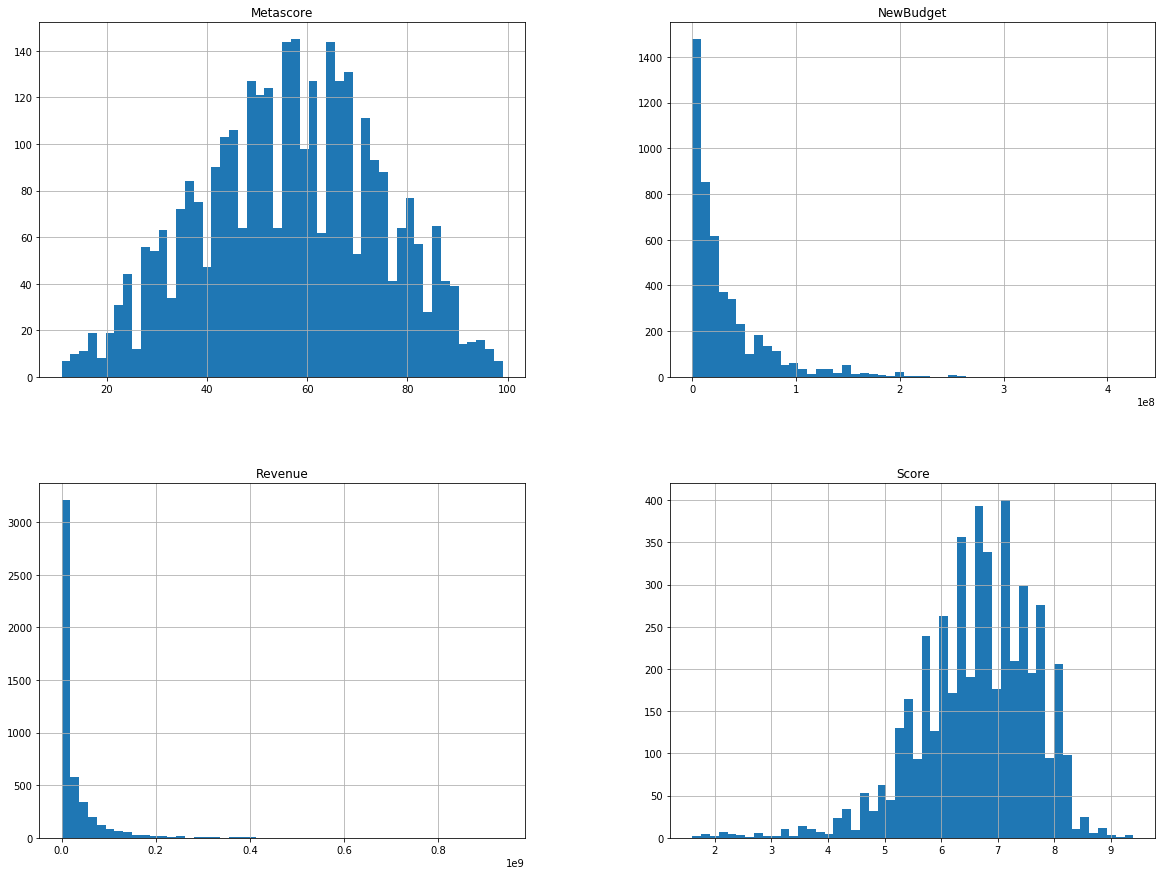

In [9]:
from matplotlib import pyplot as plt

movies.hist(bins=50, figsize=(20,15))
plt.show()

Comedy       1274
Action       1054
Drama        1018
Crime         377
Adventure     289
Horror        279
Biography     213
Animation     206
Fantasy        30
Mystery        28
Thriller       17
Western         9
Sci-Fi          9
Romance         6
FilmNoir        5
Family          3
War             1
Music           1
Name: Genre1, dtype: int64


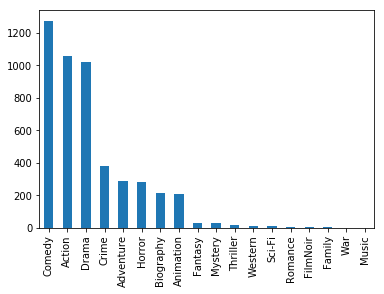

In [10]:
print(movies['Genre1'].value_counts())

movies['Genre1'].value_counts().plot.bar()

Woody Allen               20
Clint Eastwood            18
Alfred Hitchcock          16
Steven Soderbergh         12
John Ford                 12
Martin Scorsese           12
Joel Schumacher           11
Ridley Scott              11
Steven Spielberg          11
Robert Rodriguez          11
Ivan Reitman              11
Ron Howard                11
Sidney Lumet              10
John Carpenter            10
Oliver Stone              10
Brian De Palma            10
John Huston               10
Gus Van Sant               9
Lasse Hallstr??m           9
Howard Hawks               9
Francis Ford Coppola       9
Richard Linklater          9
John Boorman               9
Rob Reiner                 9
Blake Edwards              9
Antoine Fuqua              9
Werner Herzog              9
Renny Harlin               9
Barry Levinson             9
Billy Wilder               9
                          ..
Olivier Nakache            1
Bryan Spicer               1
Mark Pavia                 1
Sebasti??n Sil

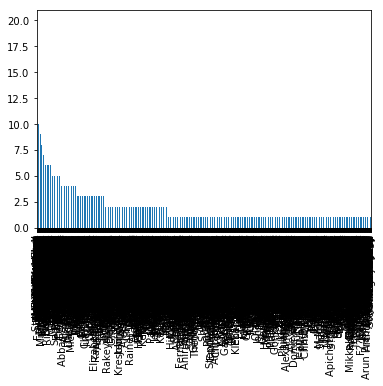

In [11]:
print(movies['Director'].value_counts())

movies['Director'].value_counts().plot.bar()

In [12]:
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=1, test_size=0.25, random_state=10)

for train_index, test_index in split.split(movies):
    train = movies.iloc[train_index]
    test = movies.iloc[test_index]
    
train.shape, test.shape

((3614, 9), (1205, 9))

In [13]:
# import necessary packages
from sklearn.preprocessing import StandardScaler # to standardize numeric columns
from sklearn.preprocessing import OneHotEncoder # to encode class columns


def pipeline(i):
    
    data_imp = i
    
    #create arrays for numberic and class columns
    num_col = ['NewBudget', 'Metascore', 'Revenue', 'Score']
    class_col = ['Genre1']
    
    # Imputation
    # Numeric Columns
    data_imp[num_col] = data_imp[num_col].fillna(data_imp[num_col].median())
    # Class Columns
    data_imp[class_col] = data_imp[class_col].fillna('MISSING')

    
    # Standardize Numeric Columns
    scaler = StandardScaler()
    data_std = scaler.fit_transform(data_imp[num_col])
    
    # Encode Class Columns
    encoder = OneHotEncoder(sparse = False)
    data_enc = encoder.fit_transform(data_imp[class_col])

    
    # Combine Class and Numeric arrays back into single data set
    dataX = np.concatenate([data_std[:,0:3], data_enc], axis=1)
    dataY = data_std[:,3]
    return dataX,dataY

trainX, trainY = pipeline(train)
testX, testY = pipeline(test)
print(testX[0])

c:\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
c:\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


[-0.6591995   0.02308723 -0.46449465  0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


In [14]:
df = pd.DataFrame(trainX)
df.shape

(3614, 21)

In [15]:
# Linear Regression - 1

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_reg = LinearRegression()
linear_reg.fit(trainX,trainY)

mse_lr_cv = - cross_val_score(linear_reg, trainX, trainY, cv=5, scoring='neg_mean_squared_error')
r2_lr_cv = cross_val_score(linear_reg, trainX, trainY, cv=5, scoring='r2')

print('Linear Reg Train R2: ', linear_reg.score(trainX,trainY))
print('Linear Reg CV MSE: ', mse_lr_cv.mean())
print('Linear Reg CV R2: ', r2_lr_cv.mean())

Linear Reg Train R2:  0.35136271513825557
Linear Reg CV MSE:  0.6549080119099362
Linear Reg CV R2:  0.3449620895719485


In [16]:
# Logistic regression

def log_pipeline(i):
    
    data_imp = i
    
    #create arrays for numberic and class columns
    num_col = ['NewBudget', 'Metascore', 'Revenue']
    class_col = ['Genre1']
    bin_score = data_imp['Score']
    bin_score_list = []
    
    #Get the binary version of target
    for score in bin_score:
        if score >= 7.0:
            bin_score_list.append(1)
        elif score < 7.0:
            bin_score_list.append(0)
    target = np.array(bin_score_list)
    
    # Imputation
    # Numeric Columns
    data_imp[num_col] = data_imp[num_col].fillna(data_imp[num_col].median())
    # Class Columns
    data_imp[class_col] = data_imp[class_col].fillna('MISSING')

    
    # Standardize Numeric Columns
    scaler = StandardScaler()
    data_std = scaler.fit_transform(data_imp[num_col])
    
    # Encode Class Columns
    encoder = OneHotEncoder(sparse = False)
    data_enc = encoder.fit_transform(data_imp[class_col])

    
    # Combine Class and Numeric arrays back into single data set
    dataX = np.concatenate([data_std[:,0:3], data_enc], axis=1)
    dataY = target
    return dataX,dataY

trainX_log, trainY_log = log_pipeline(train)
testX_log, testY_log = log_pipeline(test)

c:\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
c:\python37\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [17]:
# Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

#create new model
log = LogisticRegression()

#train 
log.fit(trainX_log, trainY_log)

#get CV accuracy
accuracy_3cv = cross_val_score(log, trainX_log, trainY_log, cv=5, scoring="accuracy")

#get prediction for computation of F1 score
y_train_pred = cross_val_predict(log, trainX_log, trainY_log, cv=5)

print('Training Accuracy: ', log.score(trainX_log, trainY_log))
print('Cross-Validation Accuracy: ',accuracy_3cv.mean())
print('Cross-Validation F1: ', f1_score(trainY_log, y_train_pred))

Training Accuracy:  0.737410071942446
Cross-Validation Accuracy:  0.7365781236231002
Cross-Validation F1:  0.6661991584852734


In [18]:
# Regularization L2
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1 , 5, 10, 50, 100]}]

log = LogisticRegression(penalty='l2', max_iter=5000)

grid_search = GridSearchCV(log, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX_log,trainY_log)

print(grid_search.best_params_)
print(grid_search.best_score_)



{'C': 5}
-0.08100611669492416


In [19]:
from sklearn.metrics import mean_squared_error
# get the prediction
log.fit(trainX_log, trainY_log)

trainY_pred_log = log.predict(trainX_log)

#get the MSE
mse_log = mean_squared_error(trainY, trainY_pred_log)

print('Logistic Reg Train R2:' , log.score(trainX_log,trainY_log))
print('Logistic Reg Train MSE:', mse_log)

Logistic Reg Train R2: 0.737410071942446
Logistic Reg Train MSE: 0.9349372592538624


In [23]:
# SVM
from sklearn import *
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR()

param_grid = [{
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['rbf'],
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}]

grid_search_SVR = GridSearchCV(svr, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search_SVR = GridSearchCV(svr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search_SVR.fit(trainX,trainY)
print(grid_search_SVR.best_params_)
print(grid_search_SVR.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.3621112101234983


In [24]:
grid_search_SVR = GridSearchCV(svr, param_grid, cv=3, scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search_SVR.fit(trainX,trainY)
print(grid_search_SVR.best_params_)
print(grid_search_SVR.best_score_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-0.7984033205897112


In [25]:
from sklearn.metrics import *

mse_svr_cv = - cross_val_score(svr, trainX, trainY, cv=5, scoring='neg_mean_squared_error')
r2_svr_cv = cross_val_score(svr, trainX, trainY, cv=5, scoring='r2')

print('SVM MSE: ', mse_svr_cv.mean())
print('SVM R2: ', r2_svr_cv.mean())

SVM MSE:  0.6414267441219439
SVM R2:  0.3583495553993789


In [26]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

mse_rf_cv = - cross_val_score(rf_reg, trainX, trainY, cv=5, scoring='neg_mean_squared_error')
r2_rf_cv = cross_val_score(rf_reg, trainX, trainY, cv=5, scoring='r2')

print('Random Forest MSE: ', mse_rf_cv.mean())
print('Random Forest R2: ', r2_rf_cv.mean())

Random Forest MSE:  0.7557088231283556
Random Forest R2:  0.24580114983319837


<h2>Results</h2>

|Model|Training CV MSE|Training CV R2|
|-----|---------------------|----------------|
|Linear Regression|0.6547|0.3452|
|Logistic Regression|0.9349|0.7374|
|SVM|0.6414|0.3583|
|Random Forest|0.7547|0.2453|